In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from kde_copula_nn_pdf import KDECopulaNNPdf
from scipy.stats import norm
from scipy.stats import multivariate_normal
from sklearn.neural_network import MLPClassifier

In [2]:
%matplotlib inline

In [3]:
# generate bivariate gaussian with correlation
mux=0
muy=0
sigmax=1
sigmay=1
rho=0.7
N=100000

np.random.seed(42)
X2 = np.random.multivariate_normal([mux,muy], [[sigmax*sigmax,rho*sigmax*sigmay],[rho*sigmax*sigmay,sigmay*sigmay]], size=N)

In [4]:
pdf = KDECopulaNNPdf(rho=0.4).fit(X2)

Transforming variables.
Fitting and calibrating classifier.
Model = rho: 0.4, number of selected non-linear variables: 2


In [12]:
pdf.score(X2)

/miniconda3/envs/name_matching/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


-251992.5236603897

In [13]:
p = pdf.pdf(X2)

/miniconda3/envs/name_matching/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


In [14]:
p[:10]

array([0.19397825, 0.05675388, 0.21877299, 0.04740699, 0.17337092,
       0.1757445 , 0.0333854 , 0.04177411, 0.12712715, 0.05748896])

In [15]:
values = np.array([0.19397825, 0.05675388, 0.21877299, 0.04740699, 0.17337092,
       0.1757445 , 0.0333854 , 0.04177411, 0.12712715, 0.05748896])

In [7]:
# theoretical pdf values
rv = multivariate_normal([mux,muy], [[sigmax*sigmax,rho*sigmax*sigmay],[rho*sigmax*sigmay,sigmay*sigmay]])
p2 = rv.pdf(X2)

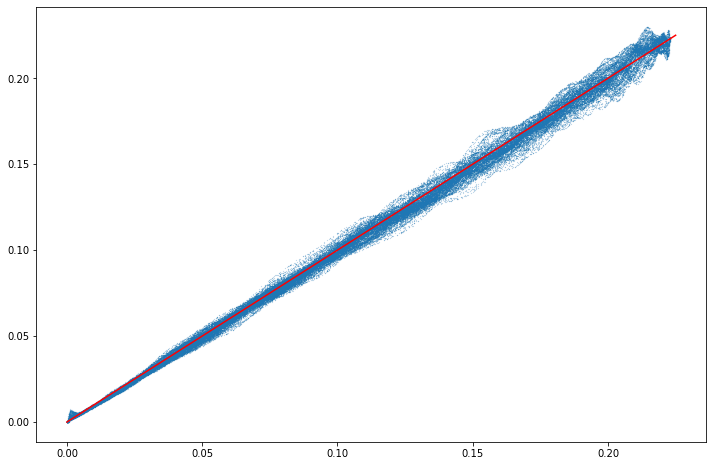

In [8]:
# compare the two
x = np.linspace(0, 0.225, 100)
plt.figure(figsize=(12,8))
plt.plot(x,x, color='red')
plt.scatter(p2, p, s=0.01)

In [9]:
dp = p-p2

In [16]:
np.mean(dp)

-0.0006830598754785879

In [17]:
np.std(dp)

0.003739759595844843